In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

In [2]:
crash = pd.read_csv('Traffic_Crashes_-_Crashes.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
crash

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,012c5bfce715efb2f2b387d6dd86f9c13e9dc1809fb52a...,JG341943,NaN,07/12/2023 03:05:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,UNKNOWN,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",07/15/2023 11:30:00 AM,IMPROPER TURNING/NO SIGNAL,UNABLE TO DETERMINE,4754,W,63RD ST,813.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,15,4,7,41.778542,-87.742065,POINT (-87.742064741348 41.778541938106)
1,01d457f032e23d935a0b8f6b4c88221375180ffd4cd959...,JG338388,NaN,07/12/2023 05:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",07/12/2023 06:41:00 PM,FOLLOWING TOO CLOSELY,NOT APPLICABLE,8300,S,PULASKI RD,834.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,17,4,7,41.742131,-87.721824,POINT (-87.72182410033 41.742130554062)
2,02249b4747a4bf40b88a8357304a98dfeaef9c38eebbf0...,JG350008,NaN,07/12/2023 02:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,OTHER OBJECT,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,"RUT, HOLES",NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,Y,NaN,"$501 - $1,500",07/21/2023 10:10:00 AM,NOT APPLICABLE,NOT APPLICABLE,9615,S,STONY ISLAND AVE,431.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14,4,7,41.719844,-87.584790,POINT (-87.584789974824 41.719844228292)
3,03e3b6caad71b78ed9ae325648effa9512bfb2517aed30...,JG338049,NaN,07/12/2023 07:05:00 AM,30,TRAFFIC SIGNAL,UNKNOWN,FREEZING RAIN/DRIZZLE,DAYLIGHT,REAR END,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",07/12/2023 02:18:00 PM,FOLLOWING TOO CLOSELY,UNABLE TO DETERMINE,2370,N,ASHLAND AVE,1811.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7,4,7,41.925105,-87.668291,POINT (-87.668291181568 41.925104953308)
4,0481fc919b38f1572d4ba04b069766102d904a662ff096...,JG338431,NaN,07/12/2023 06:30:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,WET,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",07/12/2023 07:15:00 PM,FOLLOWING TOO CLOSELY,FOLLOWING TOO CLOSELY,5200,N,ELSTON AVE,1623.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,18,4,7,41.975258,-87.751991,POINT (-87.751990557158 41.97525809527)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746493,fffd677d6dc42284b0120f213770fce9e112dee8c01534...,HZ566267,NaN,12/27/2016 08:20:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,2.0,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",12/27/2016 08:50:00 AM,NOT APPLICABLE,NOT APPLICABLE,6248,S,CALIFORNIA AVE,823.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,8,3,12,41.779488,-87.693553,POINT (-87.693552561715 41.7794880

In [5]:
crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746498 entries, 0 to 746497
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                746498 non-null  object 
 1   RD_NO                          742191 non-null  object 
 2   CRASH_DATE_EST_I               56389 non-null   object 
 3   CRASH_DATE                     746498 non-null  object 
 4   POSTED_SPEED_LIMIT             746498 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         746498 non-null  object 
 6   DEVICE_CONDITION               746498 non-null  object 
 7   WEATHER_CONDITION              746498 non-null  object 
 8   LIGHTING_CONDITION             746498 non-null  object 
 9   FIRST_CRASH_TYPE               746498 non-null  object 
 10  TRAFFICWAY_TYPE                746498 non-null  object 
 11  LANE_CNT                       199004 non-null  float64
 12  ALIGNMENT                     

In [6]:
crash.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,746498.000000,1.990040e+05,746498.000000,746493.000000,746498.000000,744879.000000,744879.000000,744879.000000,744879.000000,744879.000000,744879.000000,744879.0,746498.000000,746498.000000,746498.000000,741590.000000,741590.000000
mean,28.384530,1.333043e+01,3685.153833,1241.510779,2.034547,0.187205,0.001184,0.020117,0.105792,0.060112,2.005797,0.0,13.211636,4.124283,6.591971,41.854702,-87.673456
std,6.218633,2.961638e+03,2891.772465,705.406010,0.452746,0.561671,0.037419,0.166290,0.419208,0.314889,1.159425,0.0,5.562006,1.980423,3.395764,0.333701,0.677919
min,0.000000,0.000000e+00,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.936193
25%,30.000000,2.000000e+00,1241.000000,713.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.782025,-87.721612
50%,30.000000,2.000000e+00,3200.000000,1211.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.874603,-87.673901
75%,30.000000,4.000000e+00,5600.000000,1822.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.924208,-87.633134
max,99.000000,1.191625e+06,451100.000000,6100.000000,18.000000,21.000000,4.000000,10.000000,21.000000,15.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


In [8]:
#DROPPING ROWS WITH TOO MANY NULL VALUES
crash = crash.drop(['CRASH_DATE_EST_I','NOT_RIGHT_OF_WAY_I','PHOTOS_TAKEN_I','STATEMENTS_TAKEN_I','DOORING_I','WORK_ZONE_I','WORK_ZONE_TYPE','WORKERS_PRESENT_I','INJURIES_UNKNOWN'],axis = 1)

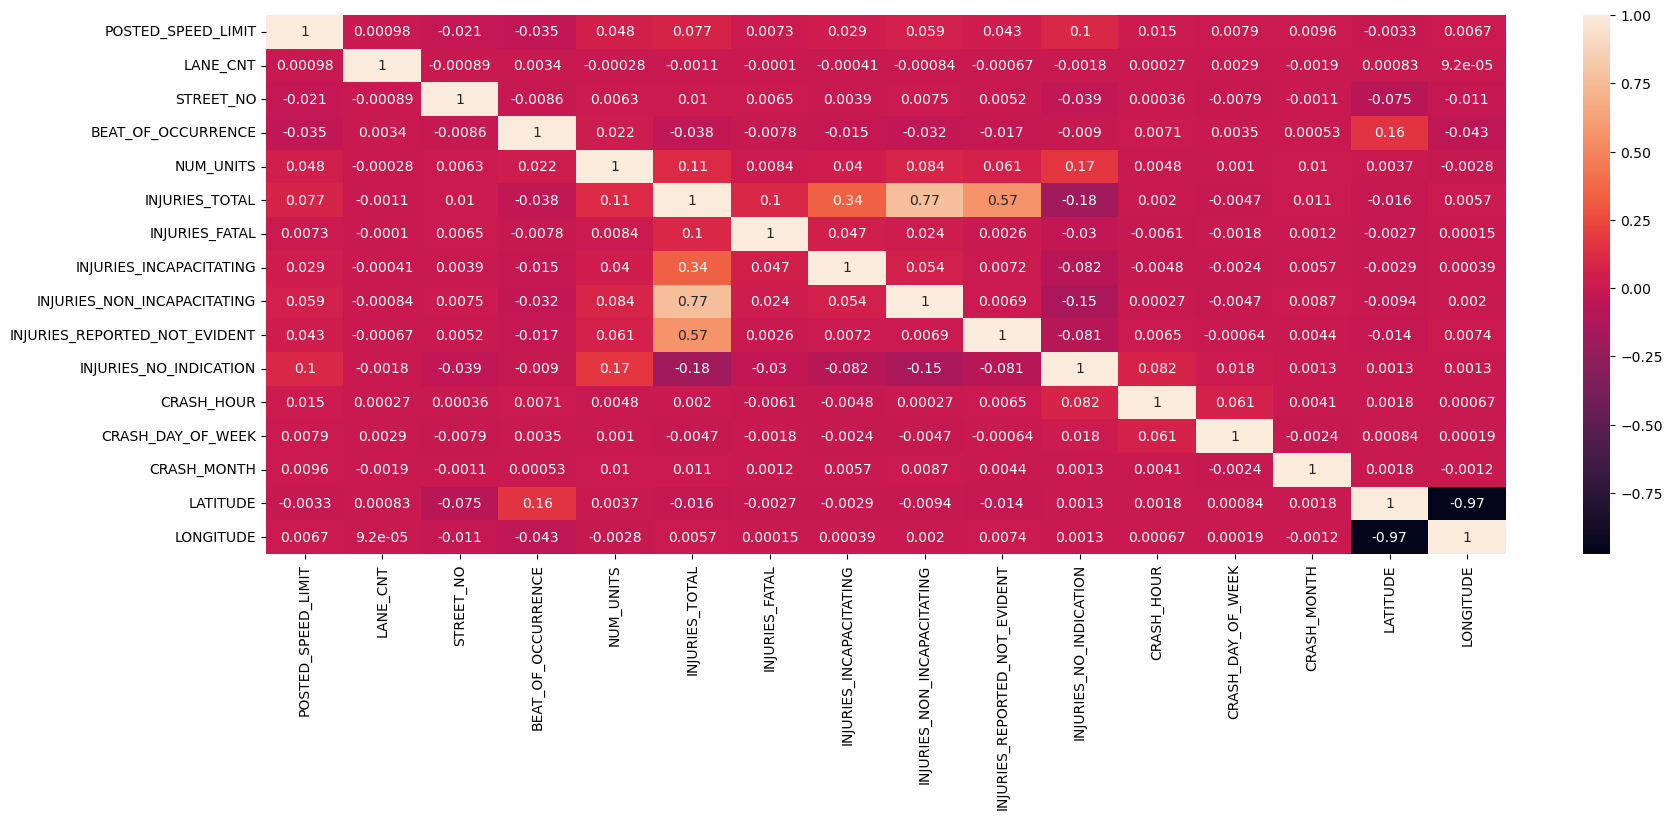

In [50]:
#Looking for correlation
sns.heatmap(crash.corr(),annot=True)
plt.rcParams['figure.figsize'] = (20,7)

plt.show()

In [52]:
dates = crash[['CRASH_DATE','INJURIES_TOTAL']]
dates['CRASH_DATE'] = dates['CRASH_DATE'].astype('datetime64[ns]')

In [11]:
dates = dates.groupby(dates.CRASH_DATE.dt.year)['INJURIES_TOTAL'].sum()

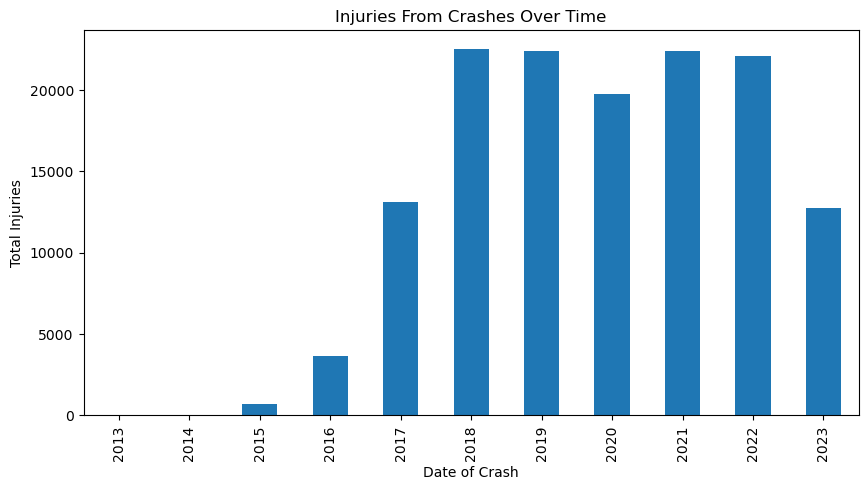

In [12]:
#How has the number of injuries been affected over time?
dates.plot.bar(figsize=(10,5))
plt.title('Injuries From Crashes Over Time')
plt.xlabel('Date of Crash')
plt.ylabel('Total Injuries')
plt.show()

In [13]:
crash.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,012c5bfce715efb2f2b387d6dd86f9c13e9dc1809fb52a...,JG341943,07/12/2023 03:05:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,UNKNOWN,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,"OVER $1,500",07/15/2023 11:30:00 AM,IMPROPER TURNING/NO SIGNAL,UNABLE TO DETERMINE,4754,W,63RD ST,813.0,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,15,4,7,41.778542,-87.742065,POINT (-87.742064741348 41.778541938106)
1,01d457f032e23d935a0b8f6b4c88221375180ffd4cd959...,JG338388,07/12/2023 05:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,"$501 - $1,500",07/12/2023 06:41:00 PM,FOLLOWING TOO CLOSELY,NOT APPLICABLE,8300,S,PULASKI RD,834.0,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,17,4,7,41.742131,-87.721824,POINT (-87.72182410033 41.742130554062)
2,02249b4747a4bf40b88a8357304a98dfeaef9c38eebbf0...,JG350008,07/12/2023 02:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,OTHER OBJECT,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,"RUT, HOLES",NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,"$501 - $1,500",07/21/2023 10:10:00 AM,NOT APPLICABLE,NOT APPLICABLE,9615,S,STONY ISLAND AVE,431.0,1,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,14,4,7,41.719844,-87.584790,POINT (-87.584789974824 41.719844228292)
3,03e3b6caad71b78ed9ae325648effa9512bfb2517aed30...,JG338049,07/12/2023 07:05:00 AM,30,TRAFFIC SIGNAL,UNKNOWN,FREEZING RAIN/DRIZZLE,DAYLIGHT,REAR END,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,"$501 - $1,500",07/12/2023 02:18:00 PM,FOLLOWING TOO CLOSELY,UNABLE TO DETERMINE,2370,N,ASHLAND AVE,1811.0,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,7,4,7,41.925105,-87.668291,POINT (-87.668291181568 41.925104953308)
4,0481fc919b38f1572d4ba04b069766102d904a662ff096...,JG338431,07/12/2023 06:30:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,WET,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,"OVER $1,500",07/12/2023 07:15:00 PM,FOLLOWING TOO CLOSELY,FOLLOWING TOO CLOSELY,5200,N,ELSTON AVE,1623.0,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,18,4,7,41.975258,-87.751991,POINT (-87.751990557158 41.97525809527)


In [14]:
crash['WEATHER_CONDITION'].unique()

array(['CLEAR', 'FREEZING RAIN/DRIZZLE', 'RAIN', 'UNKNOWN',
       'CLOUDY/OVERCAST', 'SNOW', 'FOG/SMOKE/HAZE', 'OTHER',
       'SEVERE CROSS WIND GATE', 'SLEET/HAIL', 'BLOWING SNOW',
       'BLOWING SAND, SOIL, DIRT'], dtype=object)

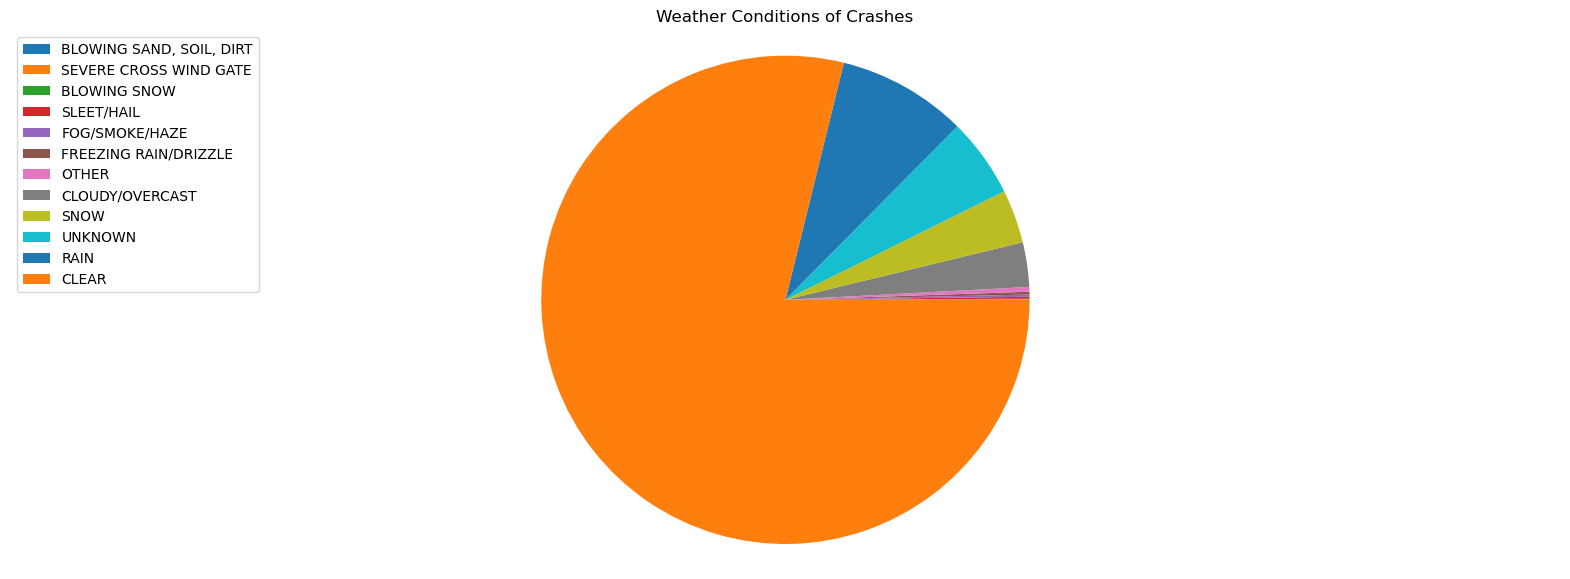

In [15]:
#What were the most common weather conditions during the accident?
condition = crash['WEATHER_CONDITION'].value_counts().sort_values().plot(kind='pie',subplots=True, labeldistance=None)
labels = crash['WEATHER_CONDITION'].unique()
plt.title('Weather Conditions of Crashes')
plt.axis('equal')
plt.ylabel("")
plt.legend(loc='upper left')
plt.show()

In [16]:
crash['STREET_NAME'].value_counts()
worst_streets = crash['STREET_NAME'].value_counts().rename_axis('Street Name').reset_index(name='Accidents')

In [17]:
#Top 5 Most Dangerous Streets in Chicago
worst_streets.head()

,Street Name,Accidents
0,WESTERN AVE,20400
1,PULASKI RD,17792
2,CICERO AVE,16724
3,ASHLAND AVE,16222
4,HALSTED ST,14510


In [18]:
crash.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,012c5bfce715efb2f2b387d6dd86f9c13e9dc1809fb52a...,JG341943,07/12/2023 03:05:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,UNKNOWN,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,"OVER $1,500",07/15/2023 11:30:00 AM,IMPROPER TURNING/NO SIGNAL,UNABLE TO DETERMINE,4754,W,63RD ST,813.0,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,15,4,7,41.778542,-87.742065,POINT (-87.742064741348 41.778541938106)
1,01d457f032e23d935a0b8f6b4c88221375180ffd4cd959...,JG338388,07/12/2023 05:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,"$501 - $1,500",07/12/2023 06:41:00 PM,FOLLOWING TOO CLOSELY,NOT APPLICABLE,8300,S,PULASKI RD,834.0,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,17,4,7,41.742131,-87.721824,POINT (-87.72182410033 41.742130554062)
2,02249b4747a4bf40b88a8357304a98dfeaef9c38eebbf0...,JG350008,07/12/2023 02:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,OTHER OBJECT,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,"RUT, HOLES",NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,"$501 - $1,500",07/21/2023 10:10:00 AM,NOT APPLICABLE,NOT APPLICABLE,9615,S,STONY ISLAND AVE,431.0,1,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,14,4,7,41.719844,-87.584790,POINT (-87.584789974824 41.719844228292)
3,03e3b6caad71b78ed9ae325648effa9512bfb2517aed30...,JG338049,07/12/2023 07:05:00 AM,30,TRAFFIC SIGNAL,UNKNOWN,FREEZING RAIN/DRIZZLE,DAYLIGHT,REAR END,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,"$501 - $1,500",07/12/2023 02:18:00 PM,FOLLOWING TOO CLOSELY,UNABLE TO DETERMINE,2370,N,ASHLAND AVE,1811.0,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,7,4,7,41.925105,-87.668291,POINT (-87.668291181568 41.925104953308)
4,0481fc919b38f1572d4ba04b069766102d904a662ff096...,JG338431,07/12/2023 06:30:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,WET,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,"OVER $1,500",07/12/2023 07:15:00 PM,FOLLOWING TOO CLOSELY,FOLLOWING TOO CLOSELY,5200,N,ELSTON AVE,1623.0,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,18,4,7,41.975258,-87.751991,POINT (-87.751990557158 41.97525809527)


In [19]:
cause = crash[['PRIM_CONTRIBUTORY_CAUSE','SEC_CONTRIBUTORY_CAUSE']]

In [20]:
cause

,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE
0,IMPROPER TURNING/NO SIGNAL,UNABLE TO DETERMINE
1,FOLLOWING TOO CLOSELY,NOT APPLICABLE
2,NOT APPLICABLE,NOT APPLICABLE
3,FOLLOWING TOO CLOSELY,UNABLE TO DETERMINE
4,FOLLOWING TOO CLOSELY,FOLLOWING TOO CLOSELY
...,...,...
746493,NOT APPLICABLE,NOT APPLICABLE
746494,UNABLE TO DETERMINE,UNABLE TO DETERMINE
746495,IMPROPER LANE USAGE,NOT APPLICABLE
746496,FAILING TO YIELD RIGHT-OF-WAY,NOT APPLICABLE


In [21]:
cause['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

UNABLE TO DETERMINE                                                                 288466
FAILING TO YIELD RIGHT-OF-WAY                                                        81696
FOLLOWING TOO CLOSELY                                                                73697
NOT APPLICABLE                                                                       39424
IMPROPER OVERTAKING/PASSING                                                          36534
FAILING TO REDUCE SPEED TO AVOID CRASH                                               31598
IMPROPER BACKING                                                                     29988
IMPROPER LANE USAGE                                                                  27154
IMPROPER TURNING/NO SIGNAL                                                           24724
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  24611
DISREGARDING TRAFFIC SIGNALS                                                         14503

In [22]:
cause['SEC_CONTRIBUTORY_CAUSE'].value_counts()

NOT APPLICABLE                                                                      304977
UNABLE TO DETERMINE                                                                 270813
FAILING TO REDUCE SPEED TO AVOID CRASH                                               28419
FAILING TO YIELD RIGHT-OF-WAY                                                        23015
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  22869
FOLLOWING TOO CLOSELY                                                                19775
IMPROPER OVERTAKING/PASSING                                                          11332
IMPROPER LANE USAGE                                                                  10571
WEATHER                                                                               8694
IMPROPER TURNING/NO SIGNAL                                                            7527
IMPROPER BACKING                                                                      6060

In [23]:
crash.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,012c5bfce715efb2f2b387d6dd86f9c13e9dc1809fb52a...,JG341943,07/12/2023 03:05:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,UNKNOWN,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,"OVER $1,500",07/15/2023 11:30:00 AM,IMPROPER TURNING/NO SIGNAL,UNABLE TO DETERMINE,4754,W,63RD ST,813.0,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,15,4,7,41.778542,-87.742065,POINT (-87.742064741348 41.778541938106)
1,01d457f032e23d935a0b8f6b4c88221375180ffd4cd959...,JG338388,07/12/2023 05:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,"$501 - $1,500",07/12/2023 06:41:00 PM,FOLLOWING TOO CLOSELY,NOT APPLICABLE,8300,S,PULASKI RD,834.0,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,17,4,7,41.742131,-87.721824,POINT (-87.72182410033 41.742130554062)
2,02249b4747a4bf40b88a8357304a98dfeaef9c38eebbf0...,JG350008,07/12/2023 02:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,OTHER OBJECT,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,"RUT, HOLES",NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,"$501 - $1,500",07/21/2023 10:10:00 AM,NOT APPLICABLE,NOT APPLICABLE,9615,S,STONY ISLAND AVE,431.0,1,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,14,4,7,41.719844,-87.584790,POINT (-87.584789974824 41.719844228292)
3,03e3b6caad71b78ed9ae325648effa9512bfb2517aed30...,JG338049,07/12/2023 07:05:00 AM,30,TRAFFIC SIGNAL,UNKNOWN,FREEZING RAIN/DRIZZLE,DAYLIGHT,REAR END,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,"$501 - $1,500",07/12/2023 02:18:00 PM,FOLLOWING TOO CLOSELY,UNABLE TO DETERMINE,2370,N,ASHLAND AVE,1811.0,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,7,4,7,41.925105,-87.668291,POINT (-87.668291181568 41.925104953308)
4,0481fc919b38f1572d4ba04b069766102d904a662ff096...,JG338431,07/12/2023 06:30:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,WET,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,"OVER $1,500",07/12/2023 07:15:00 PM,FOLLOWING TOO CLOSELY,FOLLOWING TOO CLOSELY,5200,N,ELSTON AVE,1623.0,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,18,4,7,41.975258,-87.751991,POINT (-87.751990557158 41.97525809527)


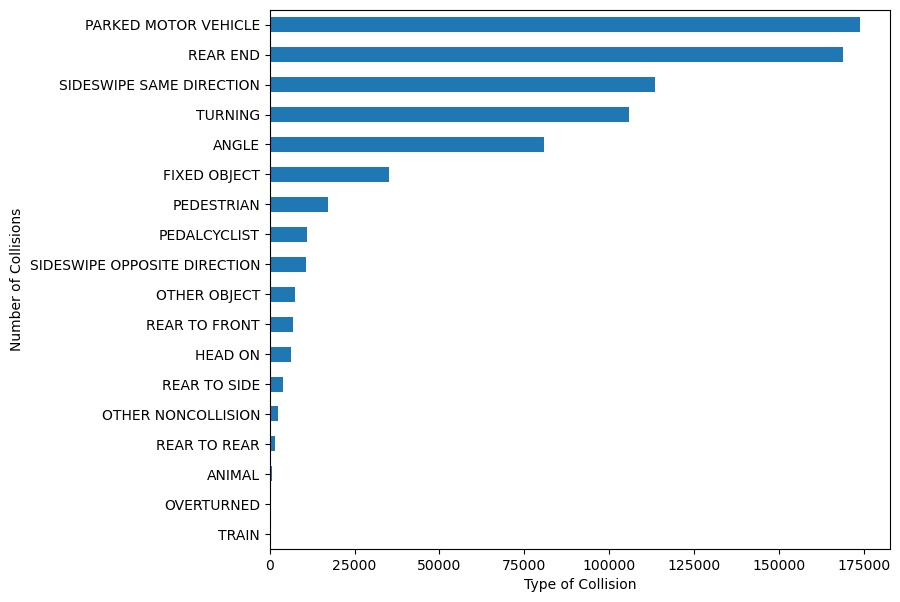

In [49]:
crash['FIRST_CRASH_TYPE'].value_counts().sort_values().plot(kind='barh',figsize=(8,7))
plt.xlabel('Type of Collision')
plt.ylabel('Number of Collisions')
plt.show()